In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../summary_data/additional/all_tools_TRB.csv')
df2 = pd.read_csv("../summary_data/additional/all_tools_TRB_diversity.csv")

## MIXCR

In [3]:
MIXCR = df[df.nReads_MIXCR != 0]

In [4]:
# Define clonotype groups based on frequency
def clonotype_group (row):
    if row['frequency_MIXCR'] > 0.01 and row['frequency_MIXCR'] <= 1:
        return 'Hyperexpanded'
    if row['frequency_MIXCR'] > 0.001 and row['frequency_MIXCR'] <= 0.01: 
        return 'Large'
    if row['frequency_MIXCR'] > 0.0001 and row['frequency_MIXCR'] <= 0.001:
        return 'Medium'
    if row['frequency_MIXCR'] > 0.00001 and row['frequency_MIXCR'] <= 0.0001:
        return 'Small'
    if row['frequency_MIXCR'] > 0 and row['frequency_MIXCR'] <= 0.00001:
        return 'Rare'

# Apply the clonotype_group function to the dataframe
MIXCR.loc[:,'clonotype_group'] = MIXCR.apply (lambda row: clonotype_group(row),axis=1)

/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [5]:
clonotype_count_MIXCR = MIXCR.groupby(['Sample','clonotype_group'], sort=False).size().reset_index(name='clonotype_count_tool')
clonotype_count_MIXCR['tool'] = 'MIXCR'

In [6]:
MIXCR_TCR = MIXCR[MIXCR.nReads_TCR != 0]
clonotype_count_MIXCR_TCR = MIXCR_TCR.groupby(['Sample','clonotype_group'], sort=False).size().reset_index(name='confirmed_clonotype_count_tool')

In [7]:
MIXCR_confirmed = pd.merge(clonotype_count_MIXCR, clonotype_count_MIXCR_TCR, how='inner', on=['Sample','clonotype_group'])
sample_type = df2[['Sample','tissue','class','tool']]
MIXCR_confirmed = pd.merge(MIXCR_confirmed, sample_type, how='inner', on=['Sample','tool'])
MIXCR_confirmed.loc[:,'confirmed_percentage'] = MIXCR_confirmed['confirmed_clonotype_count_tool']/MIXCR_confirmed['clonotype_count_tool']*100

## IMREP

In [8]:
IMREP = df[df.nReads_IMREP != 0]

In [9]:
# Define clonotype groups based on frequency
def clonotype_group (row):
    if row['frequency_IMREP'] > 0.01 and row['frequency_IMREP'] <= 1:
        return 'Hyperexpanded'
    if row['frequency_IMREP'] > 0.001 and row['frequency_IMREP'] <= 0.01: 
        return 'Large'
    if row['frequency_IMREP'] > 0.0001 and row['frequency_IMREP'] <= 0.001:
        return 'Medium'
    if row['frequency_IMREP'] > 0.00001 and row['frequency_IMREP'] <= 0.0001:
        return 'Small'
    if row['frequency_IMREP'] > 0 and row['frequency_IMREP'] <= 0.00001:
        return 'Rare'

# Apply the clonotype_group function to the dataframe
IMREP.loc[:,'clonotype_group'] = IMREP.apply (lambda row: clonotype_group(row),axis=1)

In [10]:
clonotype_count_IMREP = IMREP.groupby(['Sample','clonotype_group'], sort=False).size().reset_index(name='clonotype_count_tool')
clonotype_count_IMREP['tool'] = 'IMREP'

In [11]:
IMREP_TCR = IMREP[IMREP.nReads_TCR != 0]
clonotype_count_IMREP_TCR = IMREP_TCR.groupby(['Sample','clonotype_group'], sort=False).size().reset_index(name='confirmed_clonotype_count_tool')

In [12]:
IMREP_confirmed = pd.merge(clonotype_count_IMREP, clonotype_count_IMREP_TCR, how='inner', on=['Sample','clonotype_group'])
sample_type = df2[['Sample','tissue','class','tool']]
IMREP_confirmed = pd.merge(IMREP_confirmed, sample_type, how='inner', on=['Sample','tool'])
IMREP_confirmed.loc[:,'confirmed_percentage'] = IMREP_confirmed['confirmed_clonotype_count_tool']/IMREP_confirmed['clonotype_count_tool']*100

## TRUST4

In [13]:
TRUST4 = df[df.nReads_TRUST4 != 0]

In [14]:
# Define clonotype groups based on frequency
def clonotype_group (row):
    if row['frequency_TRUST4'] > 0.01 and row['frequency_TRUST4'] <= 1:
        return 'Hyperexpanded'
    if row['frequency_TRUST4'] > 0.001 and row['frequency_TRUST4'] <= 0.01: 
        return 'Large'
    if row['frequency_TRUST4'] > 0.0001 and row['frequency_TRUST4'] <= 0.001:
        return 'Medium'
    if row['frequency_TRUST4'] > 0.00001 and row['frequency_TRUST4'] <= 0.0001:
        return 'Small'
    if row['frequency_TRUST4'] > 0 and row['frequency_TRUST4'] <= 0.00001:
        return 'Rare'

# Apply the clonotype_group function to the dataframe
TRUST4.loc[:,'clonotype_group'] = TRUST4.apply (lambda row: clonotype_group(row),axis=1)

In [15]:
clonotype_count_TRUST4 = TRUST4.groupby(['Sample','clonotype_group'], sort=False).size().reset_index(name='clonotype_count_tool')
clonotype_count_TRUST4['tool'] = 'TRUST4'

In [16]:
TRUST4_TCR = TRUST4[TRUST4.nReads_TCR != 0]
clonotype_count_TRUST4_TCR = TRUST4_TCR.groupby(['Sample','clonotype_group'], sort=False).size().reset_index(name='confirmed_clonotype_count_tool')

In [17]:
TRUST4_confirmed = pd.merge(clonotype_count_TRUST4, clonotype_count_TRUST4_TCR, how='inner', on=['Sample','clonotype_group'])
sample_type = df2[['Sample','tissue','class','tool']]
TRUST4_confirmed = pd.merge(TRUST4_confirmed, sample_type, how='inner', on=['Sample','tool'])
TRUST4_confirmed.loc[:,'confirmed_percentage'] = TRUST4_confirmed['confirmed_clonotype_count_tool']/TRUST4_confirmed['clonotype_count_tool']*100

## CATT

In [18]:
CATT = df[df.nReads_CATT != 0]

In [19]:
# Define clonotype groups based on frequency
def clonotype_group (row):
    if row['frequency_CATT'] > 0.01 and row['frequency_CATT'] <= 1:
        return 'Hyperexpanded'
    if row['frequency_CATT'] > 0.001 and row['frequency_CATT'] <= 0.01: 
        return 'Large'
    if row['frequency_CATT'] > 0.0001 and row['frequency_CATT'] <= 0.001:
        return 'Medium'
    if row['frequency_CATT'] > 0.00001 and row['frequency_CATT'] <= 0.0001:
        return 'Small'
    if row['frequency_CATT'] > 0 and row['frequency_CATT'] <= 0.00001:
        return 'Rare'

# Apply the clonotype_group function to the dataframe
CATT.loc[:,'clonotype_group'] = CATT.apply (lambda row: clonotype_group(row),axis=1)

In [20]:
clonotype_count_CATT = CATT.groupby(['Sample','clonotype_group'], sort=False).size().reset_index(name='clonotype_count_tool')
clonotype_count_CATT['tool'] = 'CATT'

In [21]:
CATT_TCR = CATT[CATT.nReads_TCR != 0]
clonotype_count_CATT_TCR = CATT_TCR.groupby(['Sample','clonotype_group'], sort=False).size().reset_index(name='confirmed_clonotype_count_tool')

In [22]:
CATT_confirmed = pd.merge(clonotype_count_CATT, clonotype_count_CATT_TCR, how='inner', on=['Sample','clonotype_group'])
sample_type = df2[['Sample','tissue','class','tool']]
CATT_confirmed = pd.merge(CATT_confirmed, sample_type, how='inner', on=['Sample','tool'])
CATT_confirmed.loc[:,'confirmed_percentage'] = CATT_confirmed['confirmed_clonotype_count_tool']/CATT_confirmed['clonotype_count_tool']*100

In [23]:
combined = pd.concat([MIXCR_confirmed,IMREP_confirmed,TRUST4_confirmed,CATT_confirmed])
combined

,Sample,clonotype_group,clonotype_count_tool,tool,confirmed_clonotype_count_tool,tissue,class,confirmed_percentage
0,addsample01,Large,142,MIXCR,12,PBMC,T_cell_rich_high_SDI,8.450704
1,addsample01,Hyperexpanded,8,MIXCR,3,PBMC,T_cell_rich_high_SDI,37.500000
2,addsample02,Large,214,MIXCR,38,PBMC,T_cell_rich_high_SDI,17.757009
3,addsample02,Hyperexpanded,8,MIXCR,8,PBMC,T_cell_rich_high_SDI,100.000000
4,addsample03,Hyperexpanded,54,MIXCR,19,PBMC,T_cell_rich_high_SDI,35.185185
...,...,...,...,...,...,...,...,...
12,addsample08,Medium,1062,CATT,133,PBMC,T_cell_rich_high_SDI,12.523540
13,addsample09,Medium,772,CATT,123,PBMC,T_cell_rich_high_SDI,15.932642
14,addsample09,Large,145,CATT,6,PBMC,T_cell_rich_high_SDI,4.137931
15,addsample10,Medium,937,CATT,153,PBMC,T_cell_rich_high_SDI,16.328709


In [24]:
mean_confirmed_clonotype = combined.groupby(["class","clonotype_group"])["clonotype_count_tool","confirmed_clonotype_count_tool","confirmed_percentage",].agg(["mean", "std"])
display(mean_confirmed_clonotype)
tools = ['MIXCR','IMREP','TRUST4','CATT']              
for tool in tools:
    print(tool)
    df_tool = combined.loc[combined['tool'] == tool]
    mean_confirmed_clonotype_tool = df_tool.groupby(["class","clonotype_group"])["clonotype_count_tool","confirmed_clonotype_count_tool","confirmed_percentage"].agg(["mean", "std"]) 
    display(mean_confirmed_clonotype_tool)

/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


clonotype_count_tool              \
                                                     mean         std   
class                clonotype_group                                    
T_cell_rich_high_SDI Hyperexpanded              15.133333   18.312862   
                     Large                     222.151515  138.957755   
                     Medium                    919.500000  341.194903   

                                     confirmed_clonotype_count_tool  \
                                                               mean   
class                clonotype_group                                  
T_cell_rich_high_SDI Hyperexpanded                         6.900000   
                     Large                                70.484848   
                     Medium                              175.500000   

                                                 confirmed_percentage  \
                                             std                 mean   
class                clonotype_group                                    
T_cell_rich_high_SDI Hyperexpanded      6.326463            58.956651   
                     Large             78.349426            27.845482   
                     Medium           159.948910            17.494438   

                                                 
                                            std  
class                clonotype_group             
T_cell_rich_high_SDI Hyperexpanded    28.468738  
                     Large            20.597440  
                     Medium           13.607602

MIXCR


/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


clonotype_count_tool              \
                                                     mean         std   
class                clonotype_group                                    
T_cell_rich_high_SDI Hyperexpanded              13.900000   15.523817   
                     Large                     225.555556  132.574612   

                                     confirmed_clonotype_count_tool  \
                                                               mean   
class                clonotype_group                                  
T_cell_rich_high_SDI Hyperexpanded                         8.400000   
                     Large                                97.666667   

                                                 confirmed_percentage  \
                                             std                 mean   
class                clonotype_group                                    
T_cell_rich_high_SDI Hyperexpanded      6.186006            75.247354   
                     Large            111.849229            35.979085   

                                                 
                                            std  
class                clonotype_group             
T_cell_rich_high_SDI Hyperexpanded    26.366036  
                     Large            22.556231

IMREP


/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


clonotype_count_tool             \
                                                     mean        std   
class                clonotype_group                                   
T_cell_rich_high_SDI Hyperexpanded                   24.9  25.431608   
                     Large                          161.0  89.693128   

                                     confirmed_clonotype_count_tool  \
                                                               mean   
class                clonotype_group                                  
T_cell_rich_high_SDI Hyperexpanded                            9.100   
                     Large                                   59.875   

                                                confirmed_percentage  \
                                            std                 mean   
class                clonotype_group                                   
T_cell_rich_high_SDI Hyperexpanded     8.047774            49.967838   
                     Large            68.386376            30.475410   

                                                 
                                            std  
class                clonotype_group             
T_cell_rich_high_SDI Hyperexpanded    30.376313  
                     Large            20.742580

TRUST4


/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


clonotype_count_tool              \
                                                     mean         std   
class                clonotype_group                                    
T_cell_rich_high_SDI Hyperexpanded               6.222222    1.787301   
                     Large                     345.500000  122.408469   
                     Medium                    679.000000  239.495303   

                                     confirmed_clonotype_count_tool  \
                                                               mean   
class                clonotype_group                                  
T_cell_rich_high_SDI Hyperexpanded                         3.444444   
                     Large                                91.600000   
                     Medium                              200.750000   

                                                 confirmed_percentage  \
                                             std                 mean   
class                clonotype_group                                    
T_cell_rich_high_SDI Hyperexpanded      1.589899            56.283069   
                     Large             56.249840            29.190364   
                     Medium           180.905823            25.603327   

                                                 
                                            std  
class                clonotype_group             
T_cell_rich_high_SDI Hyperexpanded    19.428281  
                     Large            20.077146  
                     Medium           19.849192

CATT


/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


clonotype_count_tool              \
                                                     mean         std   
class                clonotype_group                                    
T_cell_rich_high_SDI Hyperexpanded                   10.0         NaN   
                     Large                           93.0   27.820855   
                     Medium                        1015.7  336.221174   

                                     confirmed_clonotype_count_tool  \
                                                               mean   
class                clonotype_group                                  
T_cell_rich_high_SDI Hyperexpanded                         1.000000   
                     Large                                 8.666667   
                     Medium                              165.400000   

                                                 confirmed_percentage  \
                                             std                 mean   
class                clonotype_group                                    
T_cell_rich_high_SDI Hyperexpanded           NaN            10.000000   
                     Large              6.377042             9.897037   
                     Medium           160.151456            14.250883   

                                                
                                           std  
class                clonotype_group            
T_cell_rich_high_SDI Hyperexpanded         NaN  
                     Large            7.274193  
                     Medium           9.758043

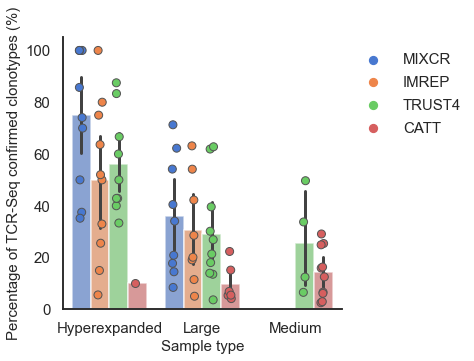

In [25]:
sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (5,5))

ax = sns.barplot(x='clonotype_group',y='confirmed_percentage',data=combined,palette="muted",alpha=0.7,
                 hue='tool',order=['Hyperexpanded','Large','Medium'],errwidth=3)
sns.stripplot(x="clonotype_group",y="confirmed_percentage",data=combined,s=8,palette="muted",
              hue='tool',order=['Hyperexpanded','Large','Medium'],dodge=True,linewidth=1)

ax.set_xlabel('Sample type',fontsize=15)
ax.set_ylabel('Percentage of TCR-Seq confirmed clonotypes (%)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1, 1),frameon=False)
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()

plt.savefig("../figures/supplementary/figureS18/figureS18e.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS18/figureS18e.png",bbox_inches="tight")

plt.show()